In [ ]:
from openai import OpenAI
import json
import os
import shutil
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

940.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 540 kB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
sk = "hmm thats suspicious"
client = OpenAI(api_key=sk)

In [ ]:
files = os.listdir("essays_to_analyze")
chn = []
jap = []
kor = []
idn = []
twn = []
for i in files:
    if "CHN" in i: chn.append(i)
    elif "JPN" in i: jap.append(i)
    elif "KOR" in i: kor.append(i)
    elif "IDN" in i: idn.append(i)
    elif "TWN" in i: twn.append(i)
codes = {'A2_0', 'B1_1', 'B1_2', 'B2_0'}
students = []
countries = [chn, jap, kor, idn, twn]
for country in countries:
    for code in codes:
        l = []
        for i in countries:
            if code in i:
                l.append(i)
        students.append(l)

In [5]:
student_essays = []
for i in students:
    l = []
    for es in i:
        with open("essays_to_analyze/"+es, mode="r") as f:
            l.append(f.read())
    student_essays.append(l)

In [ ]:
# for count, i in enumerate(student_essays):
#     s = students[count][0][3:6]+"_"+students[count][0][-13:-9]
#     try:
#         os.mkdir("Essays/"+s)
#     except: pass
#     messages = [
#         {"role": "system", "content": f"You are an english as a second language (ESL) essay analyzer."},
#         {"role": "user", "content": f"Please analyze the following essays, which were written by the same person, for lexical sophistication and get an overall understanding of the author's English capabilities. Then produce an essay of similar ability for the following topic: `Do you think recycling is good?` Do not provide any responses to the prompt such as 'certainly', etc. Essay 1: {i[0]}\nEssay 2:{i[1]}"}
#     ]
#     completion = client.chat.completions.create(
#         model="gpt-4o-mini",
#         messages=messages
#     )
#     with open("Essays/"+s+"/GPT.txt", mode="w") as f:
#         f.write(completion.choices[0].message.content.replace("\n", " "))
#     with open("Essays/"+s+"/Student1.txt", mode="w") as f:
#         f.write(student_essays[count][0])
#     with open("Essays/"+s+"/Student2.txt", mode="w") as f:
#         f.write(student_essays[count][1])

In [ ]:
fol = os.listdir("Essays")

In [ ]:
for fold in fol:
    os.rename(f"Essays/{fold}/GPT.txt", f"Essays/{fold}/{fold}_GPT.txt")
    os.rename(f"Essays/{fold}/Student1.txt", f"Essays/{fold}/{fold}_1.txt")
    os.rename(f"Essays/{fold}/Student2.txt", f"Essays/{fold}/{fold}_2.txt")

In [ ]:
dest = "All"
for fold in fol:
    shutil.move(f"Essays/{fold}/{fold}_GPT.txt", dest)
    shutil.move(f"Essays/{fold}/{fold}_1.txt", dest)
    shutil.move(f"Essays/{fold}/{fold}_2.txt", dest)

F-statistic: 19.98140671058769, p-value: 2.655736308714753e-07


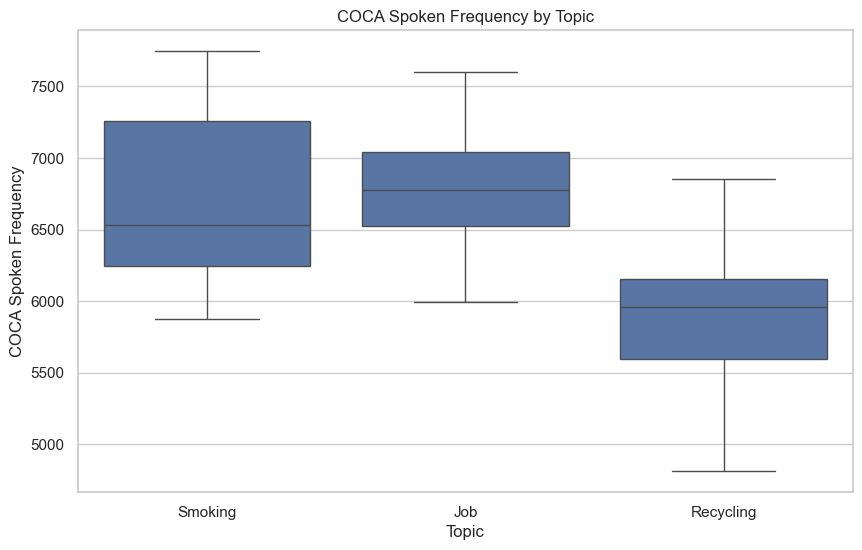

In [7]:
df = pd.read_csv('grouped_results.csv')
groups = [group['COCA_spoken_Frequency_AW'].values for name, group in df.groupby('Topic')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

# Set the plot style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Topic', y='COCA_spoken_Frequency_AW', data=df)

# Add titles and labels
plt.title('COCA Spoken Frequency by Topic')
plt.xlabel('Topic')
plt.ylabel('COCA Spoken Frequency')
plt.show()